<a href="https://colab.research.google.com/github/AceRb6/Analitica-y-visualizacion-avanzada-de-datos/blob/main/Practica04_AVDA_CPIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 4**

## Importar librerías necesarias

Estas son las librerias que se ocuparon para la practica completa, tanto el trai_test para separar el dataset para entrenaminto y validacion, modelos lineales para seleccion se predictores y metricas para medir la influencia.

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV ,LassoCV
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Carga del dataset 1

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1k3qcS5wam19fQi65wIfC_Tdubx1hu6yN' -O data.csv

data = read_csv('data.csv')
display(data.head())

--2025-03-28 17:46:04--  https://drive.google.com/uc?export=download&id=1k3qcS5wam19fQi65wIfC_Tdubx1hu6yN
Resolving drive.google.com (drive.google.com)... 142.250.31.101, 142.250.31.139, 142.250.31.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1k3qcS5wam19fQi65wIfC_Tdubx1hu6yN&export=download [following]
--2025-03-28 17:46:04--  https://drive.usercontent.google.com/download?id=1k3qcS5wam19fQi65wIfC_Tdubx1hu6yN&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c23::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17681 (17K) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]  17.27K  --.-KB/s    in 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Analisis del dataset

In [ ]:
display(data.describe())
display(data.info())

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


None

Se observa que "horsepower" es del tipo "object" asumiendo que es posiblemente un error de que sea considerado un texto, entonces lo volvemos numerico

In [ ]:
#volver numerico horsepower
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
print(data['horsepower'].dtype)

float64


In [ ]:
#ver datos NaN de horsepower:
print("Total de NaN en 'Horsepower:'",data['horsepower'].isna().sum())
#eliminar datos na:
data = data.dropna(subset=['horsepower'])
print("Total de NaN en 'Horsepower:'",data['horsepower'].isna().sum())

Total de NaN en 'Horsepower:' 5
Total de NaN en 'Horsepower:' 0


Igual se considero ver si habia valores NaN y se quitaron para que no hubiera problemas en el entrenamiento

## Seleccion de variable objetivo y predictor

In [ ]:
#asignacion de 'horsepower' y 'mpg'
X = data[['horsepower']].values
y = data['mpg'].values

Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar el rendimiento del modelo se utiliza un 'random_state' fijo para garantizar la reproducibilidad de los resultados

In [ ]:
# Dividir en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

## Validación Simple


Grado 1: MSE = 24.0735
Grado 2: MSE = 18.3682
Grado 3: MSE = 18.2803
Grado 4: MSE = 18.1193
Grado 5: MSE = 17.6956
Grado 6: MSE = 17.8085
Grado 7: MSE = 17.9038
Grado 8: MSE = 17.8773
Grado 9: MSE = 17.9583
Grado 10: MSE = 18.4334


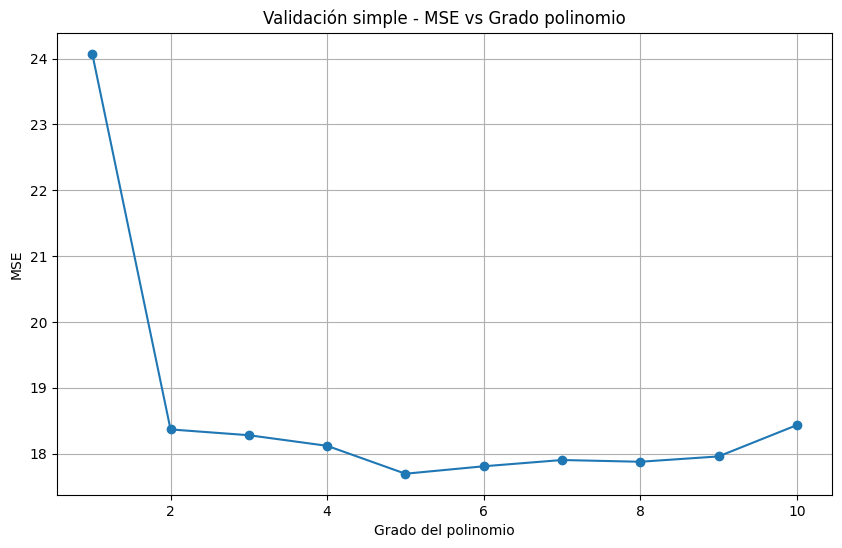

In [ ]:
mse_values = []

for degree in range(1, 11):
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Ajustar modelo
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predecir y calcular MSE
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    print(f"Grado {degree}: MSE = {mse:.4f}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_values, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE')
plt.title('Validación simple - MSE vs Grado polinomio')
plt.grid(True)
plt.show()

En la validación simple, se observa que el MSE disminuye a medida que aumenta el grado del polinomio hasta cierto punto que seria el grado 5, después del cual comienza a aumentar nuevamente. Esto sugiere que los modelos con grados más altos llegan a sobreajustarse a los datos de entrenamiento, capturando ruido en lugar de patrones generales. El comportamiento es consistente con la teoría del *sesgo-varianza: modelos más complejos tienen menor sesgo pero mayor varianza, lo que puede llevar a un peor rendimiento en datos no vistos.*

Este resultado muestra importancia de seleccionar cuidadosamente el grado del polinomio para evitar sobreajuste.

## Leave-One-Out Cross-Validation (LOOCV)

Grado 1: LOOCV MSE = 24.2315
Grado 2: LOOCV MSE = 19.2482
Grado 3: LOOCV MSE = 19.3350
Grado 4: LOOCV MSE = 19.4244
Grado 5: LOOCV MSE = 19.0332
Grado 6: LOOCV MSE = 19.1665
Grado 7: LOOCV MSE = 19.1272
Grado 8: LOOCV MSE = 19.0122
Grado 9: LOOCV MSE = 19.1725
Grado 10: LOOCV MSE = 19.9059


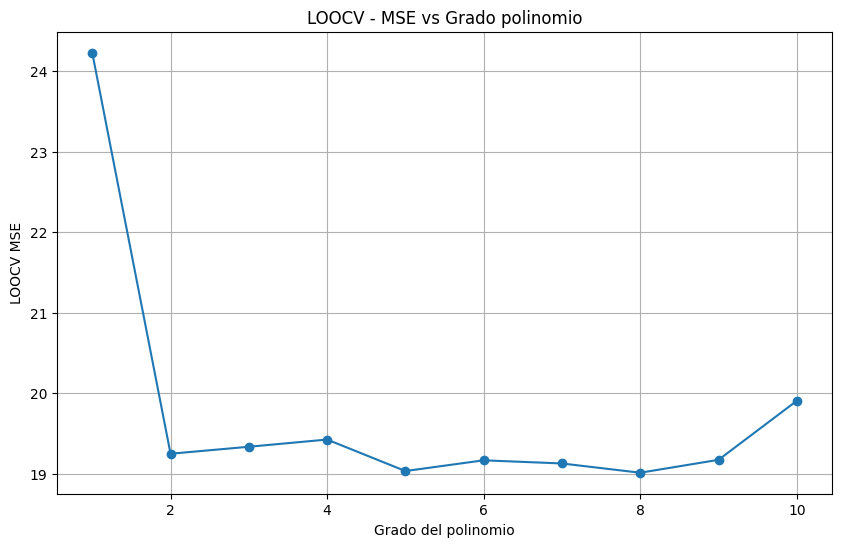

In [ ]:
loo = LeaveOneOut()
mse_loo = []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    mse_temp = []
    for train_idx, test_idx in loo.split(X_poly):
        X_train_loo, X_test_loo = X_poly[train_idx], X_poly[test_idx]
        y_train_loo, y_test_loo = y[train_idx], y[test_idx]

        model = LinearRegression()
        model.fit(X_train_loo, y_train_loo)
        y_pred = model.predict(X_test_loo)
        mse_temp.append(mean_squared_error(y_test_loo, y_pred))

    mse_loo.append(np.mean(mse_temp))
    print(f"Grado {degree}: LOOCV MSE = {np.mean(mse_temp):.4f}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_loo, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('LOOCV MSE')
plt.title('LOOCV - MSE vs Grado polinomio')
plt.grid(True)
plt.show()

El análisis mediante LOOCV muestra resultados similares a la validación simple, con un mínimo en el MSE alrededor del grado 5. Sin embargo, los valores de MSE son ligeramente más altos en promedio, lo que refleja una evaluación más conservadora del modelo al utilizar todos los datos posibles para prueba. Esto resalta la robustez de LOOCV como método de validación, ya que reduce la variabilidad asociada a la división aleatoria de los datos. Sin embargo, su alto costo computacional debe considerarse en conjuntos de datos más grandes.

## 10-Fold Cross-Validation

Grado 1: 10-fold CV MSE = 24.4246
Grado 2: 10-fold CV MSE = 19.2383
Grado 3: 10-fold CV MSE = 19.2631
Grado 4: 10-fold CV MSE = 19.3928
Grado 5: 10-fold CV MSE = 18.9119
Grado 6: 10-fold CV MSE = 19.1058
Grado 7: 10-fold CV MSE = 19.1083
Grado 8: 10-fold CV MSE = 19.0277
Grado 9: 10-fold CV MSE = 19.2647
Grado 10: 10-fold CV MSE = 20.1328


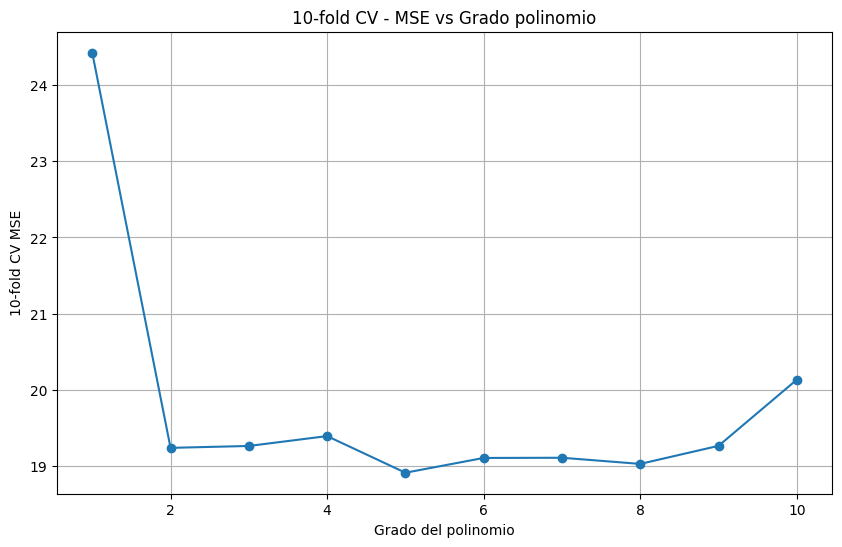

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=43)
mse_kfold = []

for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    mse_temp = []
    for train_idx, test_idx in kf.split(X_poly):
        X_train_kf, X_test_kf = X_poly[train_idx], X_poly[test_idx]
        y_train_kf, y_test_kf = y[train_idx], y[test_idx]

        model = LinearRegression()
        model.fit(X_train_kf, y_train_kf)
        y_pred = model.predict(X_test_kf)
        mse_temp.append(mean_squared_error(y_test_kf, y_pred))

    mse_kfold.append(np.mean(mse_temp))
    print(f"Grado {degree}: 10-fold CV MSE = {np.mean(mse_temp):.4f}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_kfold, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('10-fold CV MSE')
plt.title('10-fold CV - MSE vs Grado polinomio')
plt.grid(True)
plt.show()

La validación mediante 10-fold CV arroja resultados muy similares a LOOCV, con un mínimo en el MSE también alrededor del grado 5. La estabilidad de los resultados entre LOOCV y 10-fold CV sugiere que ambos métodos son adecuados para evaluar el rendimiento del modelo.

10-fold CV es computacionalmente más eficiente que LOOCV, lo que lo hace preferible en situaciones prácticas donde el tiempo de cálculo es crítico. Además, la aleatorización introducida por 10-fold CV ayuda a mitigar el impacto de posibles sesgos en la partición de los datos.

## Comparación de Resultados

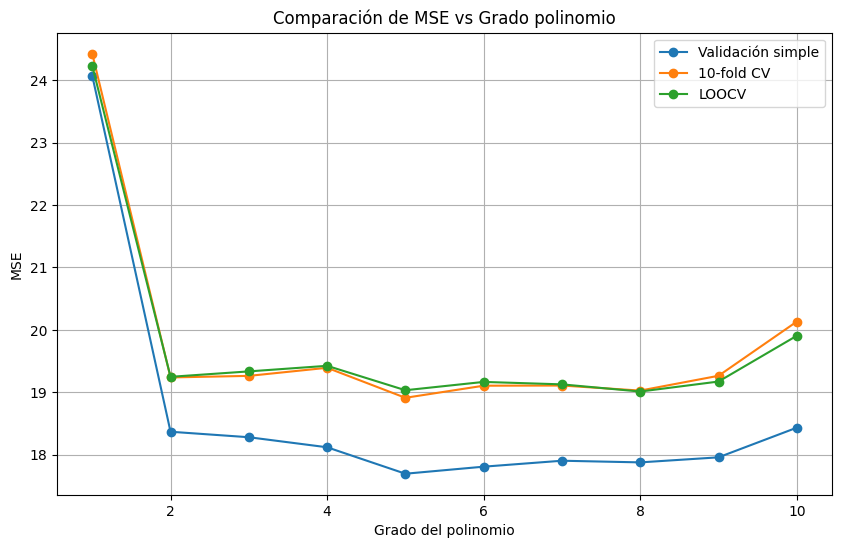

In [ ]:
#grafica de validacion simple, k-fold y LOOC
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_values, marker='o', label='Validación simple')
plt.plot(range(1, 11), mse_kfold, marker='o', label='10-fold CV')
plt.plot(range(1, 11), mse_loo, marker='o', label='LOOCV')
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE')
plt.title('Comparación de MSE vs Grado polinomio')
plt.legend()
plt.grid(True)
plt.show()

La comparación entre los tres métodos de validación (simple, LOOCV y 10-fold CV) revela que todos convergen hacia un grado óptimo cercano a 5. Sin embargo, los valores de MSE varían ligeramente entre ellos debido a las diferencias en cómo se realizan las divisiones de los datos. La validación simple tiende a subestimar el error real porque utiliza menos datos para prueba, mientras que LOOCV y 10-fold CV proporcionan estimaciones más conservadoras. Esto subraya la necesidad de utilizar métodos de validación cruzada cuando se busca una evaluación más confiable del rendimiento del modelo.

##Carga del dataset 2

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1SgD959laqp15F2Ob12fNjO9ielna5qhk' -O data_2.csv

data_2 = read_csv('data_2.csv')
display(data_2.head())

--2025-03-28 17:46:23--  https://drive.google.com/uc?export=download&id=1SgD959laqp15F2Ob12fNjO9ielna5qhk
Resolving drive.google.com (drive.google.com)... 142.250.31.101, 142.250.31.139, 142.250.31.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SgD959laqp15F2Ob12fNjO9ielna5qhk&export=download [following]
--2025-03-28 17:46:23--  https://drive.usercontent.google.com/download?id=1SgD959laqp15F2Ob12fNjO9ielna5qhk&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.111.132, 2607:f8b0:4004:c23::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19445 (19K) [application/octet-stream]
Saving to: ‘data_2.csv’

data_2.csv          100%[===================>]  18.99K  --.-KB/s    i

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


##Analisis del dataset

In [ ]:
display(data_2.info())
display(data_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


None

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


El análisis inicial proporciona una visión general útil del dataset. Podemos ver que hay tres variables categóricas (ShelveLoc, Urban, US) que necesitarán ser codificadas para su uso en modelos, mientras que el resto son numéricas y no presentan valores nulos.

In [ ]:
# Mostrar las categorías únicas de cada variable categórica
categorical_columns = ['ShelveLoc', 'Urban', 'US']
unique_categories = {col: data_2[col].unique() for col in categorical_columns}

# Mostrar los resultados
for col, categories in unique_categories.items():
    print(f"Categorías en '{col}': {categories}")

Categorías en 'ShelveLoc': ['Bad' 'Good' 'Medium']
Categorías en 'Urban': ['Yes' 'No']
Categorías en 'US': ['Yes' 'No']


Damos una vision general de los categoricos para darnos una idea de como se codificaran los categoricos y si llegan a tener categorias mal escritas.

In [ ]:
# Separación de variables
X_carseats = data_2.drop('Sales', axis=1)
y_carseats = data_2['Sales']

La separación de variables en características (X_carseats) y variable objetivo (y_carseats) es un paso fundamental y correctamente ejecutado. Al eliminar la columna Sales del conjunto de características, se asegura que el modelo no incluya la variable dependiente como parte de los predictores.

In [ ]:
# Aplicar one-hot encoding directamente a las columnas categóricas conocidas
X_carseats = pd.get_dummies(X_carseats, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

# Mostrar información del dataframe transformado
display(X_carseats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int64
 1   Income            400 non-null    int64
 2   Advertising       400 non-null    int64
 3   Population        400 non-null    int64
 4   Price             400 non-null    int64
 5   Age               400 non-null    int64
 6   Education         400 non-null    int64
 7   ShelveLoc_Good    400 non-null    bool 
 8   ShelveLoc_Medium  400 non-null    bool 
 9   Urban_Yes         400 non-null    bool 
 10  US_Yes            400 non-null    bool 
dtypes: bool(4), int64(7)
memory usage: 23.6 KB


None

La aplicación de one-hot encoding directamente a las columnas categóricas conocidas (ShelveLoc, Urban, US) es un enfoque eficiente y limpio. Además, el resultado muestra que las variables categóricas se han transformado correctamente en columnas booleanas (bool), lo que optimiza el uso de memoria y facilita su interpretación.

## forward selection


In [ ]:
# forward selection
def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)

        for new_column in remaining_features:
            current_features = best_features + [new_column]
            X_temp = X[current_features].copy()
            X_temp = sm.add_constant(X_temp)

            try:
                model = sm.OLS(y, X_temp).fit()
                new_pval[new_column] = model.pvalues[new_column]
            except:
                new_pval[new_column] = 1.0

        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break

    return best_features

selected_features = forward_selection(X_carseats, y_carseats)
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: ['Price', 'CompPrice', 'Advertising', 'Age', 'Income']


La implementación de la búsqueda forward para seleccionar las mejores características es un enfoque sólido y bien estructurado. La función evalúa cada variable en función de su p-valor, agregando iterativamente aquellas que son estadísticamente significativas (p-valor menor al umbral definido, en este caso 0.05). Este método permite identificar un subconjunto óptimo de variables (Price, CompPrice, Advertising, Age, Income) que mejor explican la variable objetivo (Sales).

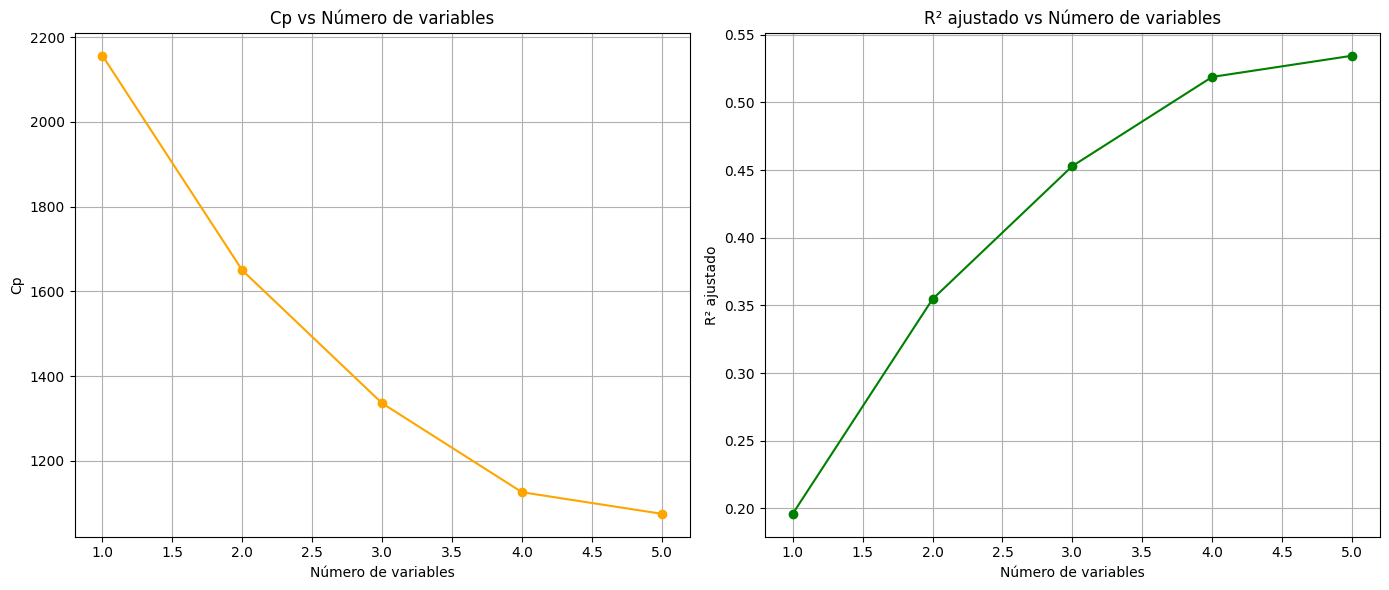

In [ ]:
# Calcular métricas
if selected_features:
    n = len(y_carseats)
    p_values = range(1, len(selected_features)+1)
    cp_values = []
    adj_r2_values = []

    for p in p_values:
        features = selected_features[:p]
        X_temp = X_carseats[features].copy()
        X_temp = sm.add_constant(X_temp)

        model = sm.OLS(y_carseats, X_temp).fit()
        mse = mean_squared_error(y_carseats, model.predict(X_temp))

        # Cálculo de Cp
        cp = (mse * n) - (n - 2*(p+1))
        cp_values.append(cp)

        # R² ajustado
        adj_r2 = model.rsquared_adj
        adj_r2_values.append(adj_r2)

    # Gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    ax1.plot(p_values, cp_values, marker='o', color='orange')
    ax1.set_xlabel('Número de variables')
    ax1.set_ylabel('Cp')
    ax1.set_title('Cp vs Número de variables')
    ax1.grid(True)

    ax2.plot(p_values, adj_r2_values, marker='o',color='green')
    ax2.set_xlabel('Número de variables')
    ax2.set_ylabel('R² ajustado')
    ax2.set_title('R² ajustado vs Número de variables')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("No se seleccionaron variables. Revisa tus datos.")

Los gráficos generados para Cp y R² ajustado muestran claramente que el modelo mejora significativamente al agregar las primeras variables, pero después de cierto punto (alrededor de 4 o 5 características), los beneficios se reducen. En el gráfico de Cp vs Número de Variables, el Cp disminuye al principio, lo que indica un mejor ajuste, pero luego comienza a aumentar ligeramente, sugiriendo que más variables no necesariamente mejoran el modelo. De manera similar, en el gráfico de R² ajustado, este crece rápidamente con las primeras variables, pero se estabiliza después, señalando que agregar más características sería redundante. Estos resultados indican que un modelo con aproximadamente 4 o 5 variables es óptimo, ya que balancea bien precisión y simplicidad sin sobreajustar.

## Modelo Ridge

In [ ]:
# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_carseats)

# Valores de lambda (alpha en scikit-learn)
alphas = np.logspace(-5, 5, 100)

# Modelo Ridge con validación cruzada
ridge_cv = RidgeCV(alphas=alphas, cv=10).fit(X_scaled, y_carseats)
best_alpha = ridge_cv.alpha_
print(f"Mejor alpha (lambda): {best_alpha}")

# Coeficientes para diferentes lambdas
coefs = []
ridge_models = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_scaled, y_carseats)
    ridge_models.append(ridge)
    coefs.append(ridge.coef_)

Mejor alpha (lambda): 1.7886495290574351


###Coeficientes estandarizados vs Lambda

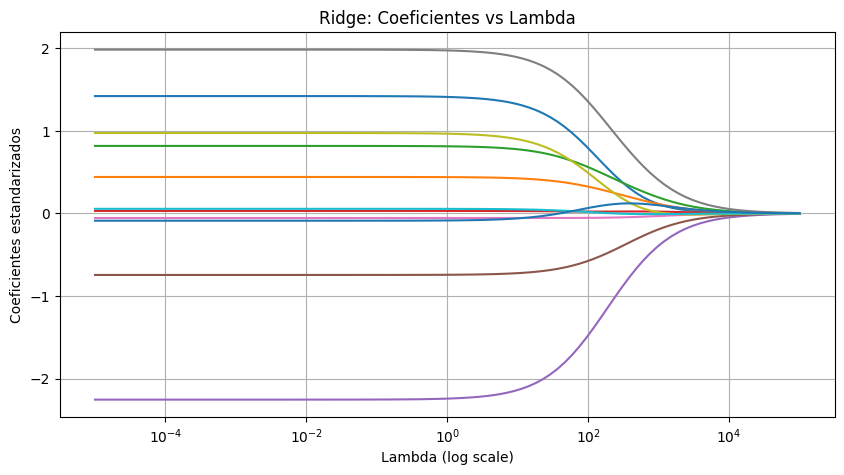

In [ ]:
# Coeficientes estandarizados vs Lambda
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Lambda (log scale)')
ax.set_ylabel('Coeficientes estandarizados')
ax.set_title('Ridge: Coeficientes vs Lambda')
plt.grid(True)
plt.show()

La grafica de los coeficientes estandarizados vs $λ$ muestra cómo Ridge reduce gradualmente los coeficientes al aumentar $λ$, controlando el sobreajuste sin eliminar completamente ninguna variable.

Para valores bajos de $λ$, los coeficientes son similares a los de una regresión lineal sin regularización, mientras que para valores altos, todos los coeficientes se comprimen hacia cero, destacando el efecto de la penalización L2.

El valor óptimo de $λ$ (1.788) refleja un equilibrio donde los coeficientes están suficientemente regulados para evitar complejidad innecesaria, pero aún conservan su influencia en el modelo, lo que garantiza un buen ajuste y generalización.

###Cp vs Lambda

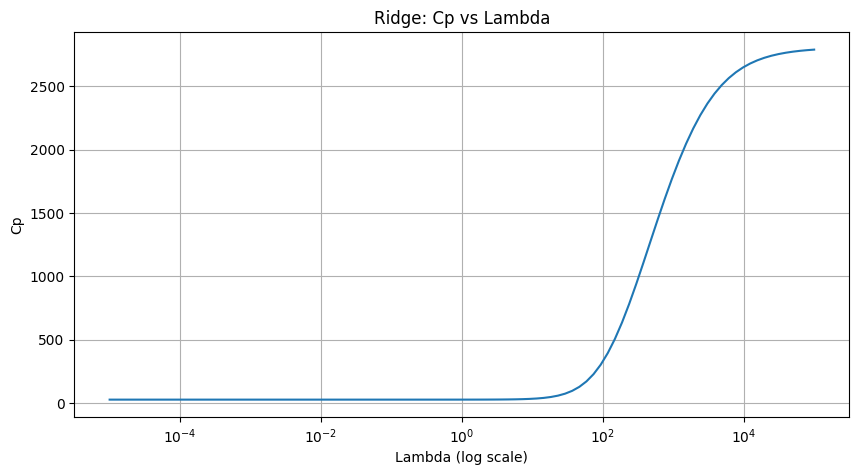

In [ ]:
# Cp vs Lambda
cp_values_ridge = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_scaled, y_carseats)
    y_pred = ridge.predict(X_scaled)
    mse = mean_squared_error(y_carseats, y_pred)
    p = np.sum(ridge.coef_ != 0)
    n = len(y_carseats)
    cp = (mse * n) - (n - 2*(p+1))
    cp_values_ridge.append(cp)

plt.figure(figsize=(10, 5))
plt.plot(alphas, cp_values_ridge)
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Cp')
plt.title('Ridge: Cp vs Lambda')
plt.grid(True)
plt.show()

El gráfico de Cp vs λ demuestra claramente cómo Ridge controla el equilibrio entre sesgo y varianza mediante la regularización. El Cp permanece bajo para valores moderados de λ, indicando un buen ajuste del modelo. pero cuando λ es demasiado alto, el Cp aumenta drásticamente, señalando un sesgo excesivo.

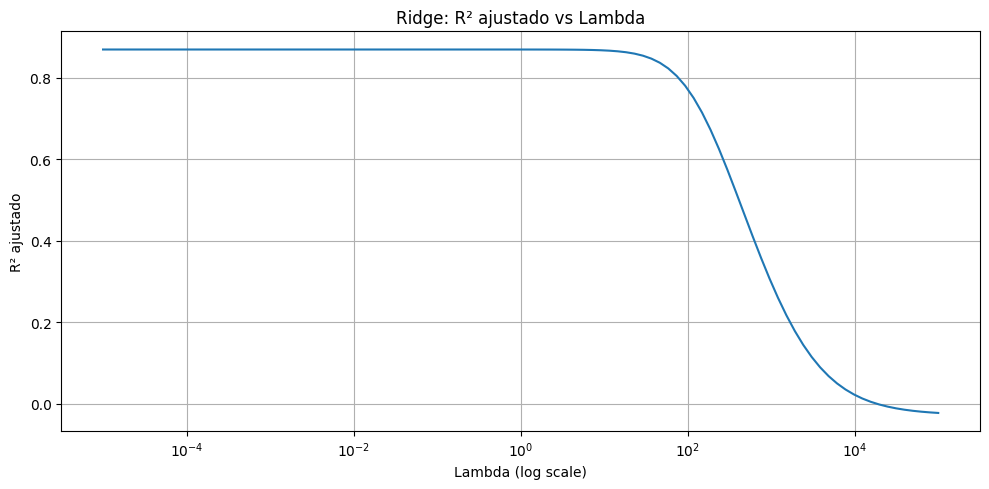

In [ ]:
# R² ajustado vs Lambda
adj_r2_values_ridge = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_scaled, y_carseats)
    y_pred = ridge.predict(X_scaled)
    r2 = r2_score(y_carseats, y_pred)
    p = np.sum(ridge.coef_ != 0)
    n = len(y_carseats)
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    adj_r2_values_ridge.append(adj_r2)

plt.figure(figsize=(10, 5))
plt.plot(alphas, adj_r2_values_ridge)
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('R² ajustado')
plt.title('Ridge: R² ajustado vs Lambda')
plt.grid(True)

plt.tight_layout()
plt.show()

El gráfico de R² ajustado vs λ demuestra claramente cómo Ridge controla el equilibrio entre sesgo y varianza mediante la regularización. El R² ajustado permanece alto para valores moderados de λ, indicando un buen ajuste del modelo. Considerando cuando λ es demasiado alto, el R² ajustado disminuye drásticamente, señalando un sesgo excesivo.

 El Cp y el R² ajustado indican que el modelo es robusto y generalizable, mientras que los coeficientes estandarizados muestran cómo Ridge controla el sobreajuste al reducir gradualmente la magnitud de los coeficientes.

##Modelo Lasso

In [ ]:
# Modelo Lasso con validación cruzada
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=100000).fit(X_scaled, y_carseats)
best_alpha_lasso = lasso_cv.alpha_
print(f"Mejor alpha (lambda) para Lasso: {best_alpha_lasso}")

# Coeficientes para diferentes lambdas
coefs_lasso = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_scaled, y_carseats)
    coefs_lasso.append(lasso.coef_)

Mejor alpha (lambda) para Lasso: 0.0008302175681319744


Este valor de $λ$ sugiere que el modelo puede capturar patrones importantes en los datos con una penalización mínima, mientras elimina variables irrelevantes.

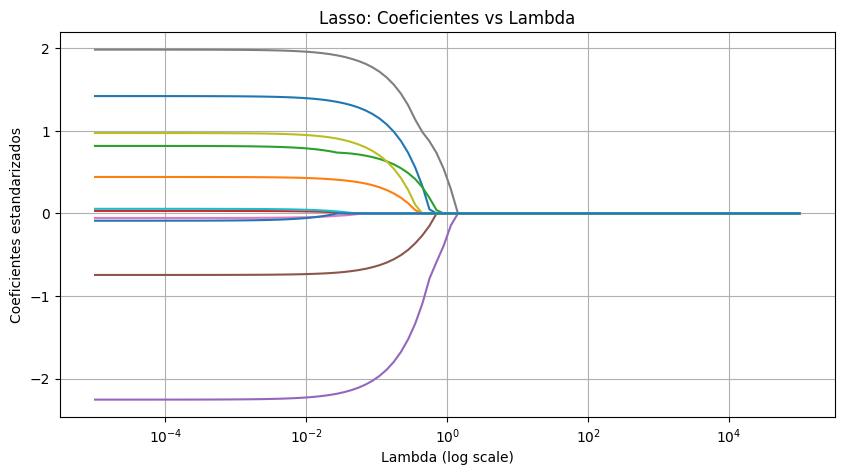

In [ ]:
# Coeficientes estandarizados vs Lambda
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
ax.set_xlabel('Lambda (log scale)')
ax.set_ylabel('Coeficientes estandarizados')
ax.set_title('Lasso: Coeficientes vs Lambda')
plt.grid(True)

El gráfico de coeficientes estandarizados vs λ demuestra claramente cómo Lasso reduce los coeficientes hacia cero y selecciona automáticamente las características más relevantes mediante la penalización L1. Las características que permanecen no nulas para valores moderados de λ son las que contribuyen significativamente al modelo, mientras que las demás son eliminadas. Este comportamiento refuerza la capacidad de Lasso para generar modelos más simples y interpretables, evitando el sobreajuste al eliminar variables irrelevantes.

### Cp vs Lambda

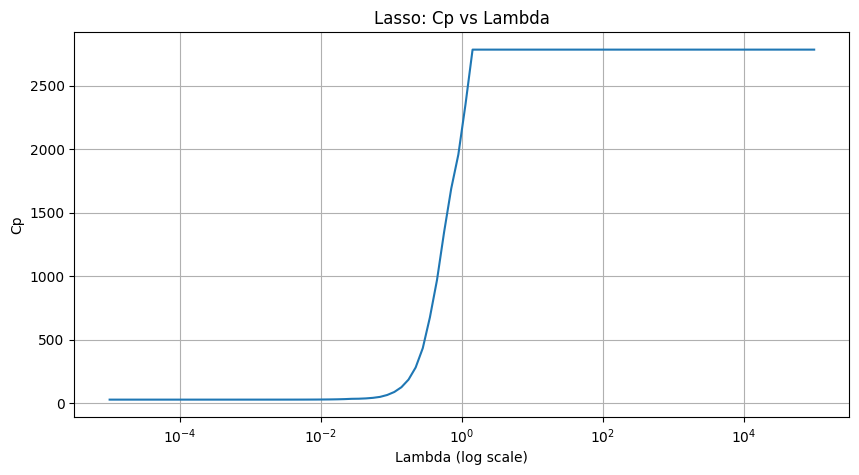

In [ ]:
# Cp vs Lambda
cp_values_lasso = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_scaled, y_carseats)
    y_pred = lasso.predict(X_scaled)
    mse = mean_squared_error(y_carseats, y_pred)
    p = np.sum(lasso.coef_ != 0)
    n = len(y_carseats)
    cp = (mse * n) - (n - 2*(p+1))
    cp_values_lasso.append(cp)

plt.figure(figsize=(10, 5))
plt.plot(alphas, cp_values_lasso)
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Cp')
plt.title('Lasso: Cp vs Lambda')
plt.grid(True)

El Cp permanece bajo para valores moderados de $λ$, indicando un buen ajuste del modelo. Pero si consideramos que cuando $λ$ es demasiado alto, el Cp aumenta drásticamente, señalando un sesgo excesivo. El valor óptimo de $λ$ (0.00083) se encuentra en un rango donde el Cp es bajo y estable, lo que refuerza la elección de este parámetro para el modelo Lasso.

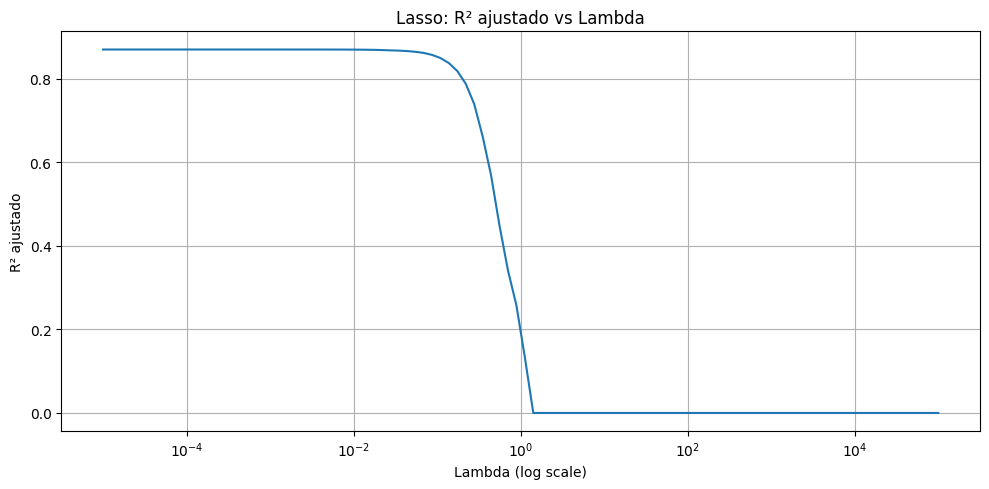

In [ ]:
# R² ajustado vs Lambda
adj_r2_values_lasso = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_scaled, y_carseats)
    y_pred = lasso.predict(X_scaled)
    r2 = r2_score(y_carseats, y_pred)
    p = np.sum(lasso.coef_ != 0)
    n = len(y_carseats)
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    adj_r2_values_lasso.append(adj_r2)

plt.figure(figsize=(10, 5))
plt.plot(alphas, adj_r2_values_lasso)
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('R² ajustado')
plt.title('Lasso: R² ajustado vs Lambda')
plt.grid(True)

plt.tight_layout()
plt.show()

El R² ajustado permanece alto para valores moderados de $λ$, indicando un buen ajuste del modelo. No obstante cuando $λ$ es demasiado alto, el R² ajustado disminuye drásticamente, señalando un sesgo excesivo. El valor óptimo de $λ$ (0.00083) se encuentra en un rango donde el R² ajustado es alto y estable, lo que refuerza la elección de este parámetro para el modelo Lasso.

Las métricas Cp y R² ajustado indican que el modelo es robusto y generalizable, mientras que los coeficientes estandarizados muestran cómo Lasso realiza una selección automática de características al eliminar variables irrelevantes.

Además, estas gráficas destacan que Lasso es especialmente útil cuando se busca un modelo más simple e interpretable, ya que reduce la dimensionalidad al eliminar predictores innecesarios. Esto lo hace preferible sobre Ridge en situaciones donde la simplicidad y la interpretación son prioritarias.

## Comparacion de Ridge y Lasso

La comparación de ambos modelos muestra que Ridge y Lasso tienen fortalezas complementarias:

* Ridge es más adecuado cuando todas las características son importantes y se desea evitar sobreajuste sin eliminar variables.
* Lasso es preferible cuando se busca simplificar el modelo y mejorar su interpretabilidad mediante la eliminación de predictores irrelevantes.

En este caso específico, dado que el dataset Carseats tiene un número moderado de características (11), ambos modelos funcionan bien, pero Lasso podría ser más útil si el objetivo principal es seleccionar un subconjunto de características clave. Por otro lado, si se desea mantener todas las variables y simplemente controlar su impacto, Ridge sería la mejor opción.

La elección entre ambos depende del objetivo del análisis: precisión y generalización (Ridge) o simplicidad e interpretabilidad (Lasso).

## Evaluacion de los modelos

In [ ]:
forward_vars = selected_features
print("Variables seleccionadas por forward selection:", forward_vars)

Variables seleccionadas por forward selection: ['Price', 'CompPrice', 'Advertising', 'Age', 'Income']


In [ ]:
ridge_final = Ridge(alpha=best_alpha).fit(X_scaled, y_carseats)
coefs_ridge = pd.Series(ridge_final.coef_, index=X_carseats.columns)
print("Coeficientes Ridge:", coefs_ridge.sort_values(ascending=False))

Coeficientes Ridge: ShelveLoc_Good      1.966735
CompPrice           1.402953
ShelveLoc_Medium    0.959817
Advertising         0.809901
Income              0.438572
Urban_Yes           0.054855
Population          0.030337
Education          -0.055194
US_Yes             -0.082638
Age                -0.740997
Price              -2.233087
dtype: float64


In [ ]:
lasso_final = Lasso(alpha=best_alpha_lasso).fit(X_scaled, y_carseats)
coefs_lasso = pd.Series(lasso_final.coef_, index=X_carseats.columns)
selected_by_lasso = coefs_lasso[coefs_lasso != 0].index.tolist()
print("Variables seleccionadas por Lasso:", selected_by_lasso)

Variables seleccionadas por Lasso: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']


In [ ]:
ridge_vars = coefs_ridge.abs().nlargest(5).index.tolist()  # Top 5 Ridge
lasso_vars = selected_by_lasso

common_vars = list(set(forward_vars) & set(ridge_vars) & set(lasso_vars))
print("Variables comunes:", common_vars)

Variables comunes: ['Advertising', 'CompPrice', 'Price']


La selección de predictores realizada mediante Forward Selection, Ridge y Lasso muestra una convergencia notable en la identificación de las variables más relevantes para predecir Sales.

Las tres técnicas coinciden en señalar a Advertising, Price y CompPrice como predictores clave, validando su importancia estadística y práctica en el contexto del problema.

Advertising refleja el impacto directo de la inversión en marketing, mientras que Price y CompPrice capturan dinámicas cruciales relacionadas con la competitividad del mercado. Como notacion importante Ridge y Lasso resaltan la relevancia de variables adicionales como ShelveLoc_Good, que tiene un coeficiente significativamente alto, lo que sugiere que la ubicación es un factor crítico para impulsar las ventas. Sin embargo, la eliminación progresiva de variables menos influyentes (como Age e Income) en Ridge y Lasso demuestra que estas técnicas son efectivas para priorizar predictores que maximizan la capacidad explicativa del modelo sin recargarlo con características redundantes.

En términos de adaptabilidad, cada método se ajusta de manera única al problema:
* Forward Selection proporciona una visión clara de las variables más influyentes basadas en métricas como Cp y R² ajustado, pero puede ser menos robusto frente a multicolinealidad.
* Ridge, por su parte, mantiene todas las variables pero reduce la magnitud de sus coeficientes, lo que permite modelar relaciones complejas sin eliminar información potencialmente útil.
* Lasso actúa como un filtro más agresivo, eliminando variables irrelevantes y simplificando el modelo, aunque podría descartar predictores débilmente relevantes que aún contribuyen al ajuste global.

La intersección de resultados entre los tres métodos (Advertising, Price, CompPrice) asegura que las variables seleccionadas sean congruentes y respaldadas por diferentes enfoques, lo que refuerza su validez en el análisis.

##Pruebas con los modelos

In [ ]:
# Variables finales seleccionadas
variables_seleccionadas = ['Advertising', 'Price', 'ShelveLoc_Good', 'Age', 'CompPrice']

# Preparar datos
X_final = X_carseats[variables_seleccionadas].copy()
y_final = y_carseats.copy()

X_final = X_final.astype(float)  # Convertir a float
y_final = y_final.astype(float)  # Convertir a float

# Añadir constante para el intercepto
X_final = sm.add_constant(X_final)

# Ajustar modelo
modelo_sm = sm.OLS(y_final, X_final)
resultado_sm = modelo_sm.fit()
print(resultado_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     270.4
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          6.04e-125
Time:                        18:30:58   Log-Likelihood:                -684.59
No. Observations:                 400   AIC:                             1381.
Df Residuals:                     394   BIC:                             1405.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.8067      0.627     12.

In [ ]:
# Variables finales seleccionadas
variables_seleccionadas = ['Advertising', 'Price', 'ShelveLoc_Good', 'CompPrice']

# Preparar datos
X_final = X_carseats[variables_seleccionadas].copy()
y_final = y_carseats.copy()

X_final = X_final.astype(float)  # Convertir a float
y_final = y_final.astype(float)  # Convertir a float

# Añadir constante para el intercepto
X_final = sm.add_constant(X_final)

# Ajustar modelo
modelo_sm = sm.OLS(y_final, X_final)
resultado_sm = modelo_sm.fit()
print(resultado_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     244.6
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          1.82e-105
Time:                        18:30:53   Log-Likelihood:                -733.11
No. Observations:                 400   AIC:                             1476.
Df Residuals:                     395   BIC:                             1496.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8882      0.633      7.

In [ ]:
# Variables finales seleccionadas
variables_seleccionadas = ['Advertising', 'Price', 'CompPrice']

# Preparar datos
X_final = X_carseats[variables_seleccionadas].copy()
y_final = y_carseats.copy()

X_final = X_final.astype(float)  # Convertir a float
y_final = y_final.astype(float)  # Convertir a float

# Añadir constante para el intercepto
X_final = sm.add_constant(X_final)

# Ajustar modelo
modelo_sm = sm.OLS(y_final, X_final)
resultado_sm = modelo_sm.fit()
print(resultado_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     111.1
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           3.26e-52
Time:                        18:31:02   Log-Likelihood:                -860.20
No. Observations:                 400   AIC:                             1728.
Df Residuals:                     396   BIC:                             1744.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2225      0.868      6.019      

Los modelos ajustados con diferentes conjuntos de variables muestran cómo el equilibrio entre simplicidad y precisión depende del número de predictores incluidos.

El modelo más completo (['Advertising', 'Price', 'ShelveLoc_Good', 'Age', 'CompPrice']) explica el 77.4% de la variabilidad en Sales, destacando la importancia de ShelveLoc_Good y Age para mejorar el ajustE. No obstante, este modelo podría ser más susceptible a problemas de multicolinealidad debido al mayor número de variables.

Comparando con el modelo (['Advertising', 'Price', 'CompPrice']) sacrifica ajuste (R² = 0.457) pero ofrece una interpretación clara y evita la inclusión de predictores menos relevantes.

El modelo intermedio (['Advertising', 'Price', 'ShelveLoc_Good', 'CompPrice']) representa un punto óptimo, ya que combina un buen ajuste (R² = 0.712) con una estructura simple y fácil de interpretar, validando la relevancia de ShelveLoc_Good como un predictor clave.

Cada modelo se adapta de manera diferente al objetivo de la práctica. Si el enfoque es maximizar la precisión predictiva, el modelo más completo es preferible, aunque requiere un análisis cuidadoso de multicolinealidad y sobreajuste. Por el contrario, si se busca un modelo interpretable, el modelo intermedio o incluso el reducido son opciones viables.

Los resultados validan la utilidad de comparar múltiples enfoques de selección de variables y ajuste de modelos, ya que permiten identificar no solo las variables más importantes sino también el nivel de complejidad adecuado para el problema específico. Esto enmarca la importancia de evaluar tanto el ajuste estadístico como la relevancia práctica al construir modelos de regresión avanzados.